In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [31]:
from google.colab import files
uploaded=files.upload()

Saving book (1).csv to book (1) (1).csv


In [38]:
data=pd.read_csv('book (1).csv', encoding= 'Latin1')
data

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


# **EDA and Feature Engineering**

In [39]:
data.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [40]:
data = data.drop(columns=['Unnamed: 0'])

In [42]:
data.tail()

,User.ID,Book.Title,Book.Rating
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8
9999,162129,Kids Say the Darndest Things,6


In [43]:
#Renaming the columns name
data.rename({'User.ID':'User_ID','Book.Title':'Book_Title','Book.Rating':'Book_Rating'},
              axis= 1, inplace= True)
data.head()

,User_ID,Book_Title,Book_Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [45]:
data.shape

(10000, 3)

In [46]:
data.info()#10000 rows, 3 columns and no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_ID      10000 non-null  int64 
 1   Book_Title   10000 non-null  object
 2   Book_Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [47]:
data[data.duplicated()]

,User_ID,Book_Title,Book_Rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [48]:
data[data.duplicated()].shape #2 duplicate rows

(2, 3)

In [49]:
book = data.drop_duplicates()

In [50]:
book.info() #9998 rows after dropping duplicate rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_ID      9998 non-null   int64 
 1   Book_Title   9998 non-null   object
 2   Book_Rating  9998 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 312.4+ KB


In [51]:
book.describe()

,User_ID,Book_Rating
count,9998.000000,9998.000000
mean,95339.726845,7.566413
std,117650.215490,1.821685
min,8.000000,1.000000
25%,2103.000000,7.000000
50%,3757.000000,8.000000
75%,162052.000000,9.000000
max,278854.000000,10.000000


In [52]:
book['Book_Rating'].value_counts().sort_values(ascending=False)

8     2283
7     2074
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book_Rating, dtype: int64

In [53]:
len(book['User_ID'].unique())

2182

In [54]:
len(book['Book_Rating'].unique())

10

In [55]:
book.Book_Title.value_counts() #total 9659 books

Fahrenheit 451                                              5
Stardust                                                    4
The Amber Spyglass (His Dark Materials, Book 3)             4
Ender's Game (Ender Wiggins Saga (Paperback))               4
The Subtle Knife (His Dark Materials, Book 2)               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: Book_Title, Length: 9659, dtype: int64

# **Visualization**

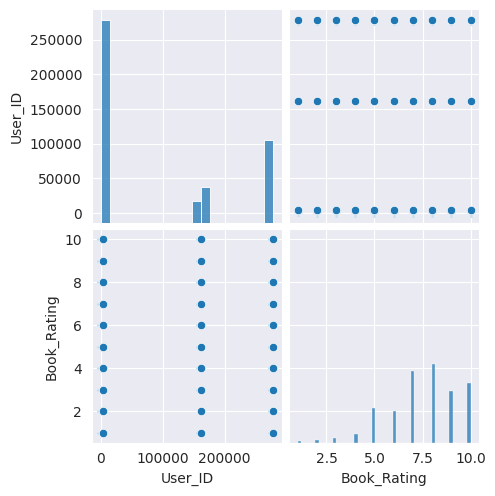

In [56]:
sns.set_style(style='darkgrid')
sns.pairplot(book)

Text(0, 0.5, 'Frequency')

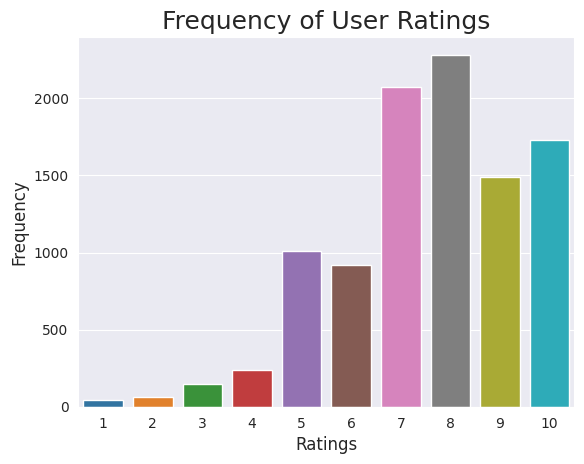

In [57]:
sns.countplot(x = 'Book_Rating', data = book)
plt.title("Frequency of User Ratings", fontsize= 18)
plt.xlabel("Ratings", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

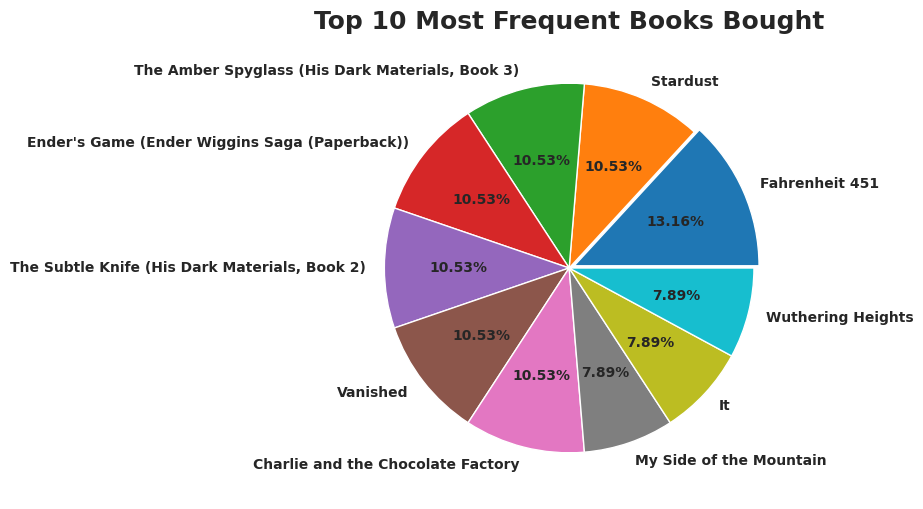

In [58]:
top_books = book['Book_Title'].value_counts().head(10)
top_books.index
plt.figure(figsize = (6,6))
plt.pie(top_books, labels=top_books.index,
        explode = [0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct= '%.2f%%', textprops = {'size' : 10, 'fontweight': 'bold'})

plt.title("Top 10 Most Frequent Books Bought", fontsize = 18, fontweight = 'bold');

# **Creating Pivot Table**

In [69]:
#creating pivot table
user_books = book.pivot_table(index='User_ID',columns='Book_Title',values='Book_Rating').fillna(0)

In [70]:
user_books

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User_ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


# **Cosine Similarity Between Users**

In [73]:
user_sim = 1-pairwise_distances(user_books.values, metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [74]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [75]:
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
#Set the index and column names to user ids to create matrix
user_sim_df.index = book.User_ID.unique()
user_sim_df.columns = book.User_ID.unique()

In [78]:
user_sim_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [79]:
user_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


In [82]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [104]:
#5 Similar Users
user_sim_df.idxmax(axis=1)[0:5]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
dtype: int64